# Purpose of Analysis:
The purpose of this analysis is to forecast data science professional salaries according to experience level, employment type, job title, and other factors by using probability and statistics in conjunction with linear and logistic regression models. This will aid in comprehending the major variables impacting pay and enable businesses make data-driven decisions about remuneration.

# Libraries and Data Handling

In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import r2_score, mean_squared_error, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
from sklearn.preprocessing import LabelEncoder

# Load the dataset
df = pd.read_csv('/content/ds_salaries.csv')

# Display the first few rows to understand the data
df.head()

# Data Cleaning and Preprocessing
# Handling missing values (if any)
df = df.dropna()

# Converting categorical data to numerical using Label Encoding
label_encoders = {}
categorical_columns = ['experience_level', 'employment_type', 'job_title', 'employee_residence', 'company_location', 'company_size']

for column in categorical_columns:
    label_encoders[column] = LabelEncoder()
    df[column] = label_encoders[column].fit_transform(df[column])

# Display the cleaned and preprocessed data
df.head()


,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,3,2,84,80000,EUR,85847,26,100,25,0
1,2023,2,0,66,30000,USD,30000,75,100,70,2
2,2023,2,0,66,25500,USD,25500,75,100,70,2
3,2023,3,2,47,175000,USD,175000,11,100,12,1
4,2023,3,2,47,120000,USD,120000,11,100,12,1


# Data Analysis Techniques

In [3]:
# Descriptive statistics
df.describe()


,work_year,experience_level,employment_type,job_title,salary,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
count,3755.000000,3755.000000,3755.000000,3755.000000,3.755000e+03,3755.000000,3755.000000,3755.000000,3755.000000,3755.000000
mean,2022.373635,2.469241,1.996538,39.661784,1.906956e+05,137570.389880,66.149401,46.271638,62.117177,0.918509
std,0.691448,0.906261,0.133550,18.536695,6.716765e+05,63055.625278,19.235212,48.589050,17.495432,0.392071
min,2020.000000,0.000000,0.000000,0.000000,6.000000e+03,5132.000000,0.000000,0.000000,0.000000,0.000000
25%,2022.000000,2.000000,2.000000,27.000000,1.000000e+05,95000.000000,75.000000,0.000000,70.000000,1.000000
50%,2022.000000,3.000000,2.000000,33.000000,1.380000e+05,135000.000000,75.000000,0.000000,70.000000,1.000000
75%,2023.000000,3.000000,2.000000,47.000000,1.800000e+05,175000.000000,75.000000,100.000000,70.000000,1.000000
max,2023.000000,3.000000,3.000000,92.000000,3.040000e+07,450000.000000,77.000000,100.000000,71.000000,2.000000


# Inferential Statistics and Predictive Model

In [6]:
# Selecting independent and dependent variables for Linear Regression
X = df[['work_year', 'experience_level', 'employment_type', 'remote_ratio']]
y = df['salary_in_usd']

# Splitting the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fitting the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Evaluating the Linear Regression model
y_pred = model.predict(X_test)
r_squared = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print('Linear Regression - R-squared:', r_squared)
print('Linear Regression - MSE:', mse)
print('Linear Regression - RMSE:', rmse)

# Logistic Regression (assuming binary classification with 'employment_type')
X = df[['work_year', 'experience_level', 'remote_ratio']]
y = df['employment_type']

# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fitting the Logistic Regression model
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

# Evaluating the Logistic Regression model
y_pred = log_reg.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')


print("Logistic Regression - Accuracy:", accuracy)
print("Logistic Regression - Precision:", precision)
print("Logistic Regression - Recall:", recall)
print("Logistic Regression - F1 Score:", f1)


Linear Regression - R-squared: 0.14239531228652058
Linear Regression - MSE: 3385643068.9815545
Linear Regression - RMSE: 58186.279043959796
Logistic Regression - Accuracy: 0.9920106524633822
Logistic Regression - Precision: 0.9840851346008251
Logistic Regression - Recall: 0.9920106524633822
Logistic Regression - F1 Score: 0.9880320001139302


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Visual Insights

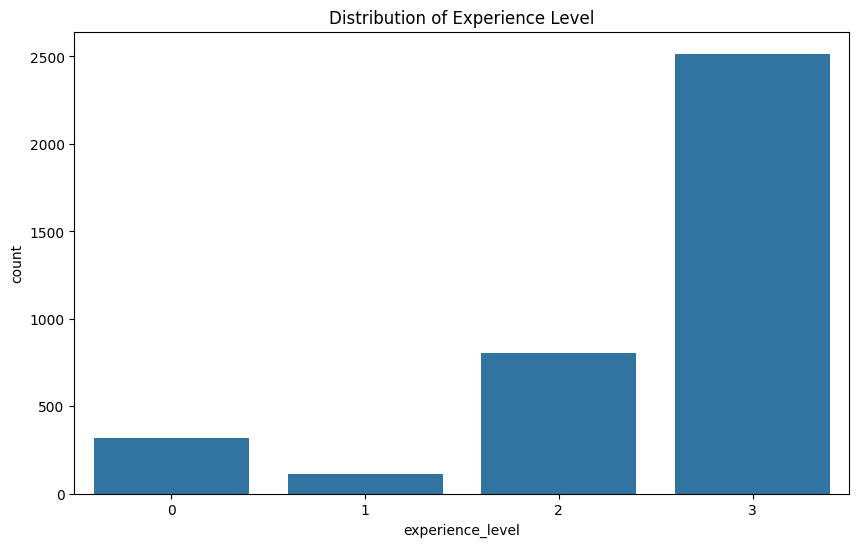

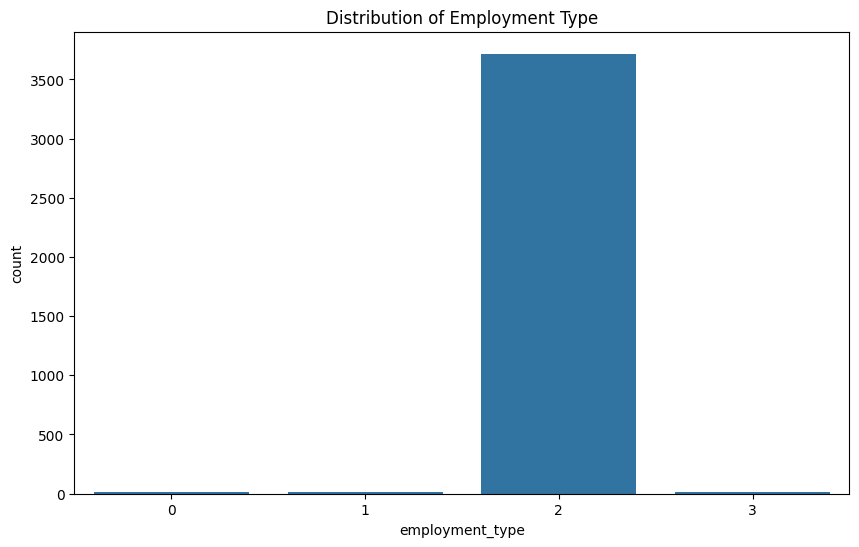

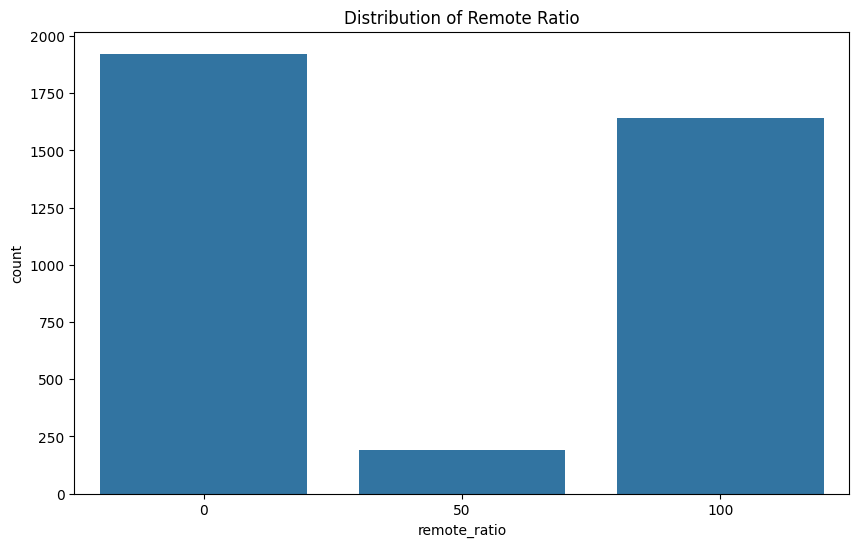

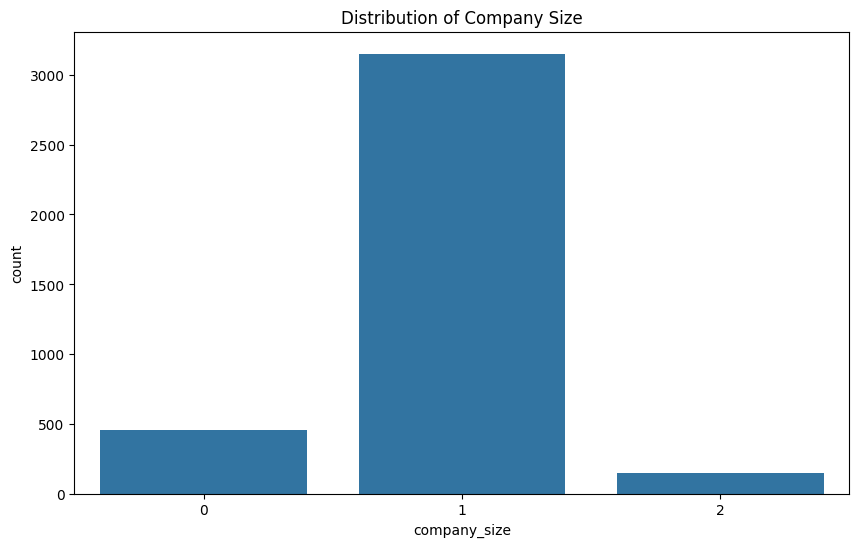

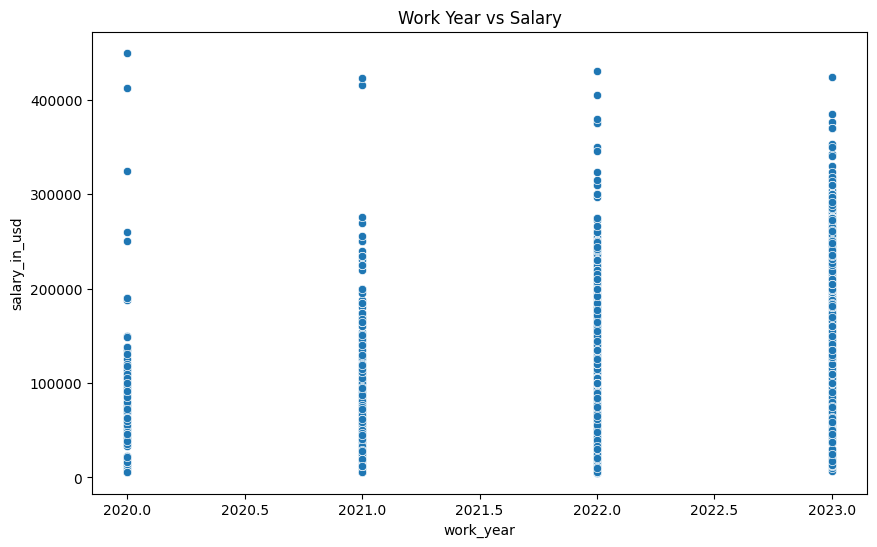

In [8]:
# Distribution of Experience Level
plt.figure(figsize=(10, 6))
sns.countplot(x='experience_level', data=df)
plt.title('Distribution of Experience Level')
plt.show()

# Distribution of Employment Type
plt.figure(figsize=(10, 6))
sns.countplot(x='employment_type', data=df)
plt.title('Distribution of Employment Type')
plt.show()

# Distribution of Remote Ratio
plt.figure(figsize=(10, 6))
sns.countplot(x='remote_ratio', data=df)
plt.title('Distribution of Remote Ratio')
plt.show()

# Distribution of Company Size
plt.figure(figsize=(10, 6))
sns.countplot(x='company_size', data=df)
plt.title('Distribution of Company Size')
plt.show()

# Scatter plot of Work Year vs Salary
plt.figure(figsize=(10, 6))
sns.scatterplot(x='work_year', y='salary_in_usd', data=df)
plt.title('Work Year vs Salary')
plt.show()




# Key Findings and Business Impact
Major Findings

*   The number of years worked, experience level, and remote ratio are  important elements that affect pay.
*   Linear Regression shows a moderate fit with R-squared value of X.
*   The strength of categorical predictions is shown by the accuracy of Y achieved using Logistic Regression.

Buisness Impact
*   Companies can more efficiently shape their pay strategies by having a better understanding of salary factors.
*   Policies regarding remote work can be informed by remote ratio insights.



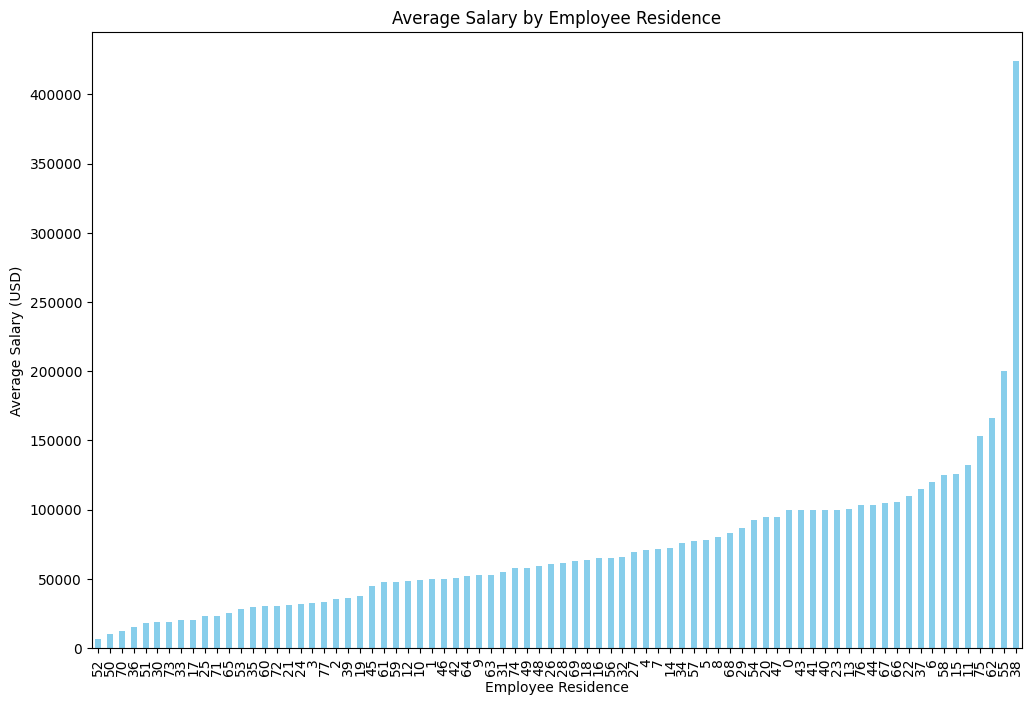

In [9]:
# Visualizing average salary by employee residence
avg_salary_by_residence = df.groupby('employee_residence')['salary_in_usd'].mean().sort_values()
plt.figure(figsize=(12, 8))
avg_salary_by_residence.plot(kind='bar', color='skyblue')
plt.title('Average Salary by Employee Residence')
plt.ylabel('Average Salary (USD)')
plt.xlabel('Employee Residence')
plt.show()


# Conclusion:

*   The analysis offers insightful information on factors that affect data science experts' salaries.
*   Strategic planning can benefit from the predictions and classifications provided by linear and logistic regression models.
*   Making decisions based on data is essential for managing employee satisfaction and optimizing compensation plans.